In [98]:
import numpy as np
import pandas as pd
import seaborn as sns

In [99]:
df=pd.read_csv("/content/titanic_toy.csv")

In [100]:
df.sample(10)

,Age,Fare,Family,Survived
406,51.0,7.7500,0,0
230,35.0,83.4750,1,1
516,34.0,10.5000,0,1
31,NaN,146.5208,1,1
260,NaN,7.7500,0,0
633,NaN,NaN,0,0
603,44.0,8.0500,0,0
327,36.0,NaN,0,1
339,45.0,35.5000,0,0
715,19.0,7.6500,0,0


In [101]:
df.isnull().sum()

,0
Age,177
Fare,45
Family,0
Survived,0


In [102]:
from sklearn.model_selection import train_test_split
x=df.drop(columns='Survived')
y=df['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [103]:
from sklearn.impute import SimpleImputer
imputer1=SimpleImputer(strategy='mean')
imputer2=SimpleImputer(strategy='median')

In [104]:
from sklearn.compose import ColumnTransformer
trf=ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [107]:
trf.fit(x_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['Age']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [108]:
x_train_imputed=trf.fit_transform(x_train)
x_test_imputed=trf.transform(x_test)

In [109]:
x_train_imputed=pd.DataFrame(x_train_imputed,columns=trf.get_feature_names_out())
x_test_imputed=pd.DataFrame(x_test_imputed,columns=trf.get_feature_names_out())

In [110]:
x_train_imputed,x_test_imputed

(     imputer1__Age  imputer2__Fare  remainder__Family
 0        40.000000         27.7208                0.0
 1         4.000000         16.7000                2.0
 2        47.000000          9.0000                0.0
 3         9.000000         31.3875                6.0
 4        20.000000          9.8458                0.0
 ..             ...             ...                ...
 707      30.000000          8.6625                0.0
 708      29.785904          8.7125                0.0
 709      71.000000         49.5042                0.0
 710      29.785904        221.7792                0.0
 711      29.785904         25.9250                0.0
 
 [712 rows x 3 columns],
      imputer1__Age  imputer2__Fare  remainder__Family
 0        42.000000         26.2875                0.0
 1        21.000000          8.0500                0.0
 2        24.000000         65.0000                3.0
 3        28.000000         56.4958                0.0
 4        17.000000          7.9250   

In [111]:
x_train_imputed.isnull().sum()

,0
imputer1__Age,0
imputer2__Fare,0
remainder__Family,0


In [ ]:
import matplotlib.pyplot as plt


/tmp/ipython-input-3529845411.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],label='Original',hist=False)
/tmp/ipython-input-3529845411.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_imputed['imputer1__Age'],label = 'Imputed',hist=False)


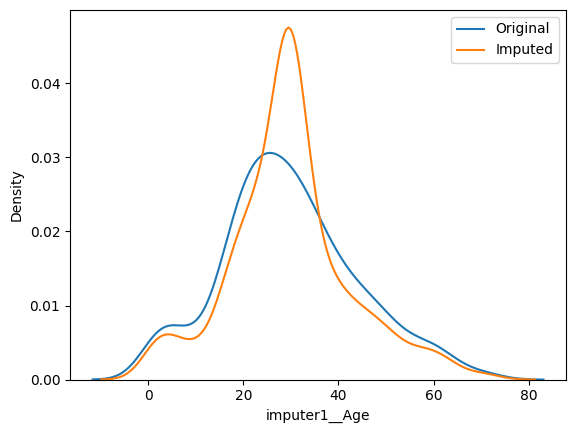

In [112]:
sns.distplot(x_train['Age'],label='Original',hist=False)
sns.distplot(x_train_imputed['imputer1__Age'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

<Axes: >

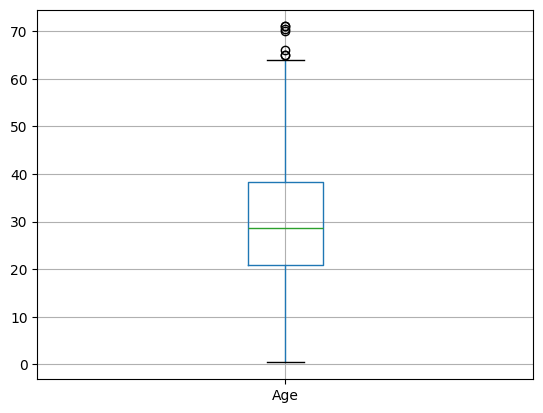

In [118]:
x_train[['Age']].boxplot()

<Axes: >

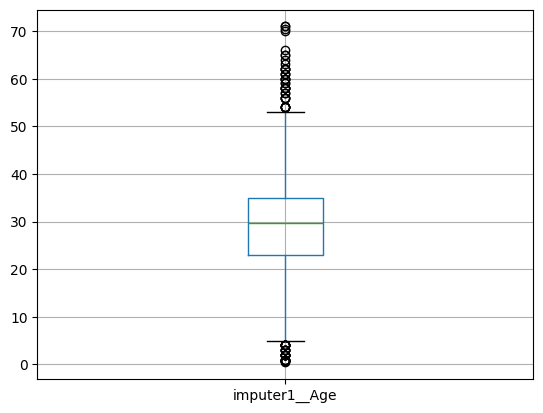

In [117]:
x_train_imputed[['imputer1__Age']].boxplot()